# Goals:


1. Intergrate all the dataset first.
2. Calculate the yearly trend of some specific name.
3. Calculate the rank of some specific name.
4. Calculate the most popular name of each year, show the names in use that have been increased or decreased the most.
5. Analyze the trend of names: vowel, diversity, length, the change of spell, first and last letter, etc.
6. Analyze the external factors of name choose: biblical names, famous people, demographic change, etc.


## data source:
[Popular baby names](https://www.ssa.gov/oact/babynames/limits.html)
The dataset we use here is the 'National Data' from Social Security Admnistration.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10 

%matplotlib inline

In [2]:
biblename = pd.read_excel (r'dataset/biblicalnames.xlsx') #for an earlier version of Excel, you may need to use the file extension of 'xls'
biblename

,name
0,Aarat
1,Aaron
2,Abaddon
3,Abagtha
4,Abana
...,...
2588,Zuph
2589,Zur
2590,Zuriel
2591,Zurishaddai


In [3]:
#we have multiple files and we want to combine all the files together into one dataframe
# pandas.concat
years = range(1880,2019) # our data up to 2018
pieces = []
columns = ['name','sex','births']
for year in years:
    path = 'dataset/babynames/yob%d.txt' % year
    frame = pd.read_csv(path,names=columns)
    frame['year']=year
    pieces.append(frame)
names=pd.concat(pieces,ignore_index=True) # concat 默认会逐行黏合，所以此处 ignore_index = True would work 
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


In [4]:
def add_prop(group):
    group['prop'] = group.births/group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1957041,Zylas,M,5,2018,0.000003
1957042,Zyran,M,5,2018,0.000003
1957043,Zyrie,M,5,2018,0.000003
1957044,Zyron,M,5,2018,0.000003


sex,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2014,1782350,1916564
2015,1780453,1911537
2016,1766212,1891585


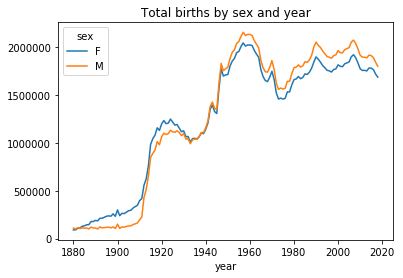

In [5]:
# use groupby or pivot table to cluster the data by years and sex
total_births = names.pivot_table('births',index = 'year', columns ='sex',aggfunc=sum)
total_births.plot(title = 'Total births by sex and year')
total_births

In [6]:
# groupby year and sex
pieces = []
for year,group in names.groupby(['year','sex']):
    pieces.append(group.sort_values(by='births',ascending = False)[:1000])
top1000 = pd.concat(pieces,ignore_index = True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
277872,Korbyn,M,207,2018,0.000115
277873,Randall,M,207,2018,0.000115
277874,Benton,M,206,2018,0.000114
277875,Coleman,M,206,2018,0.000114


In [7]:
topfemale = top1000[top1000.sex=='F']
topmale =  top1000[top1000.sex=='F']


In [8]:
def get_top_name(sex):
    if(sex=='F'):
        topname = top1000[top1000.sex=='F'].groupby(['name']).births.sum().sort_values(ascending=False)
    elif(sex=='M'):
        topname = top1000[top1000.sex=='M'].groupby(['name']).births.sum().sort_values(ascending=False)
    else:
        topname = top1000.groupby(['name']).births.sum().sort_values(ascending=False)
    return topname

In [35]:
print(get_top_name('F'))
print(get_top_name('M'))

name
Mary         4125675
Elizabeth    1638349
Patricia     1572011
Jennifer     1466854
Linda        1452668
              ...   
Sannie             5
Jerusha            5
Caro               5
Celie              5
Etter              5
Name: births, Length: 4263, dtype: int64
name
James       5164280
John        5124817
Robert      4820129
Michael     4362731
William     4117369
             ...   
Patricio          5
Nimrod            5
Ollis             5
Tilford           5
Lenzy             5
Name: births, Length: 3627, dtype: int64


### Meaning of the names:
#### Girls:

Mary: Biblical Name, 
Elizabeth
Jeniffer
Linda
Barbara
Margaret
Susan
Dorothy

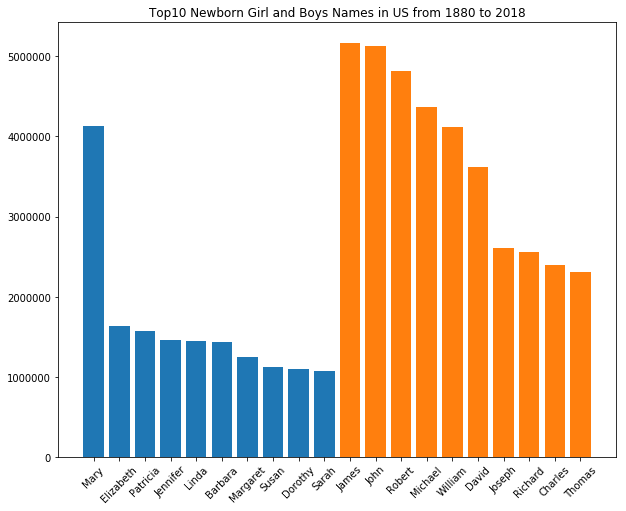

In [9]:
fig,axes = plt.subplots(1,1,figsize=(10,8))
plt.bar(get_top_name('F')[:10].index,get_top_name('F')[:10])
plt.bar(get_top_name('M')[:10].index,get_top_name('M')[:10])
plt.title('Top10 Newborn Girl and Boys Names in US from 1880 to 2018')
plt.xticks(rotation = 45)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Top1000 names trend for boys and girs from 1880 to 2018')

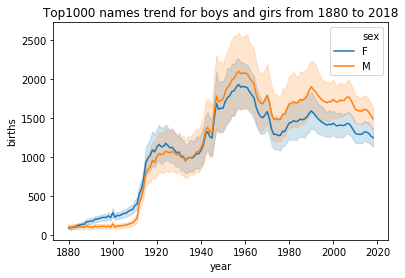

In [10]:
#Top10 names trend for boys and girs from 1880 to 2018
import seaborn as sns
sns.lineplot(data=top1000, x='year', y='births', hue='sex').set_title('Top1000 names trend for boys and girs from 1880 to 2018')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1880 to 2018
Columns: 7174 entries, Aaden to Zyaire
dtypes: float64(7174)
memory usage: 7.6 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002460299DF98>,
      dtype=object)

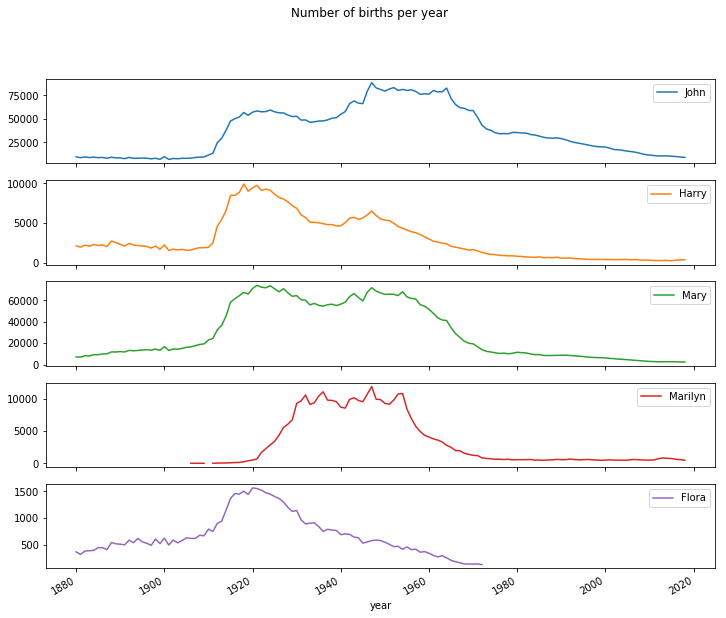

In [11]:
# analyze the trend of the names
total_births = top1000.pivot_table('births',index = 'year', columns = 'name',aggfunc=sum)
total_births.info()
subset = total_births[['John','Harry','Mary','Marilyn','Flora']]
subset.plot(subplots=True,figsize=(12,10),grid=False, title = 'Number of births per year')

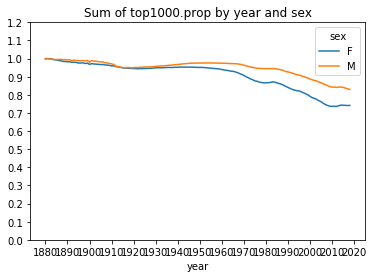

In [12]:
# use year and sex to do cluster and plot

table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)
table.plot(title='Sum of top1000.prop by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2021,10))
# 这个 top1000 trend 在下降，意味着有越来越多其他的名字在被使用。


In [13]:
# know which name is at the 50% of the total popularity 
# use prop's cumsum to calculate the total sum, and use searchsorted to get the position of the cumsum, and use a threthold 0.5 to make sure the right position

prop_cumsum = top1000.sort_values(by='prop',ascending= False).prop.cumsum()
print(prop_cumsum[:10])
prop_cumsum.values.searchsorted(0.5) +1 #0 indexed 


942      0.087383
2880     0.174427
943      0.260697
6877     0.345705
2881     0.430317
4877     0.514382
8877     0.596414
4878     0.678201
12877    0.759674
10877    0.840899
Name: prop, dtype: float64


6

In [14]:
def names_of_the_year(sex,year):
    df = top1000[top1000.sex==sex]
    df = df[df.year==year]
    return df

In [15]:
names_of_the_year('M',2018)

,name,sex,births,year,prop
276877,Liam,M,19837,2018,0.011018
276878,Noah,M,18267,2018,0.010146
276879,William,M,14516,2018,0.008063
276880,James,M,13525,2018,0.007512
276881,Oliver,M,13389,2018,0.007437
...,...,...,...,...,...
277872,Korbyn,M,207,2018,0.000115
277873,Randall,M,207,2018,0.000115
277874,Benton,M,206,2018,0.000114
277875,Coleman,M,206,2018,0.000114


In [16]:

def get_quantile_count(group,q=0.5):
    group = group.sort_values(by='prop',ascending= False).prop.cumsum()
    return group.values.searchsorted(q)+1

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2014,242,131
2015,243,135
2016,249,139


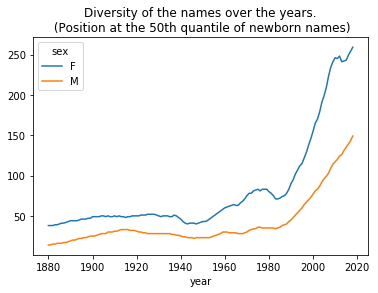

In [17]:
diversity.plot(title='Diversity of the names over the years.\n (Position at the 50th quantile of newborn names)')
# girls' name has more diversity than boys

In [18]:
# the last character of the names
get_last_char=lambda x:x[-1]
last_letters = names.name.map(get_last_char)
last_letters.name='last_letter'
table = names.pivot_table('births',index=last_letters, columns = ['sex','year'],aggfunc = sum)
subtable = table.reindex(columns=[1880,1900,1950,2000,2018],level ='year')
subtable.head()

sex                F                                                M  \
year            1880      1900      1950      2000      2018     1880   
last_letter                                                             
a            31446.0   89900.0  576581.0  676038.0  646970.0    776.0   
b                NaN       NaN      17.0     372.0     576.0    509.0   
c                NaN       NaN      15.0     525.0    1115.0    349.0   
d              609.0    3670.0    4409.0    4383.0    3516.0   9177.0   
e            33381.0  107068.0  376892.0  318445.0  300769.0  13493.0   

sex                                                 
year            1900      1950      2000      2018  
last_letter                                         
a              870.0    4029.0   40862.0   30691.0  
b              372.0    1634.0   50925.0   22563.0  
c              299.0    6493.0   27022.0   19338.0  
d            15484.0  263738.0   64334.0   41585.0  
e            22724.0  168692.0  148928.0  119409.0

In [19]:
subtable.sum()

sex  year
F    1880      90994.0
     1900     299798.0
     1950    1713065.0
     2000    1815295.0
     2018    1686961.0
M    1880     110490.0
     1900     150480.0
     1950    1790437.0
     2000    1963202.0
     2018    1800392.0
dtype: float64

In [20]:
letter_prop = subtable/subtable.sum()
letter_prop

sex                 F                                                 M  \
year             1880      1900      1950      2000      2018      1880   
last_letter                                                               
a            0.345583  0.299869  0.336579  0.372412  0.383512  0.007023   
b                 NaN       NaN  0.000010  0.000205  0.000341  0.004607   
c                 NaN       NaN  0.000009  0.000289  0.000661  0.003159   
d            0.006693  0.012242  0.002574  0.002414  0.002084  0.083057   
e            0.366848  0.357134  0.220010  0.175423  0.178290  0.122120   
...               ...       ...       ...       ...       ...       ...   
v                 NaN       NaN       NaN  0.000023  0.000270  0.000299   
w                 NaN  0.000020  0.000025  0.000468  0.003556  0.007720   
x                 NaN       NaN  0.000032  0.000407  0.001782  0.002751   
y            0.115030  0.096281  0.143432  0.135705  0.112753  0.075763   
z            0.001165  0.002035  0.000348  0.000845  0.000627  0.000262   

sex                                                  
year             1900      1950      2000      2018  
last_letter                                          
a            0.005781  0.002250  0.020814  0.017047  
b            0.002472  0.000913  0.025940  0.012532  
c            0.001987  0.003626  0.013764  0.010741  
d            0.102897  0.147304  0.032770  0.023098  
e            0.151010  0.094218  0.075860  0.066324  
...               ...       ...       ...       ...  
v            0.000126  0.000016  0.000501  0.001707  
w            0.006306  0.003918  0.028410  0.010888  
x            0.003509  0.001785  0.005445  0.011605  
y            0.084676  0.141468  0.073002  0.048798  
z            0.000153  0.000151  0.001504  0.001871  

[26 rows x 10 columns]

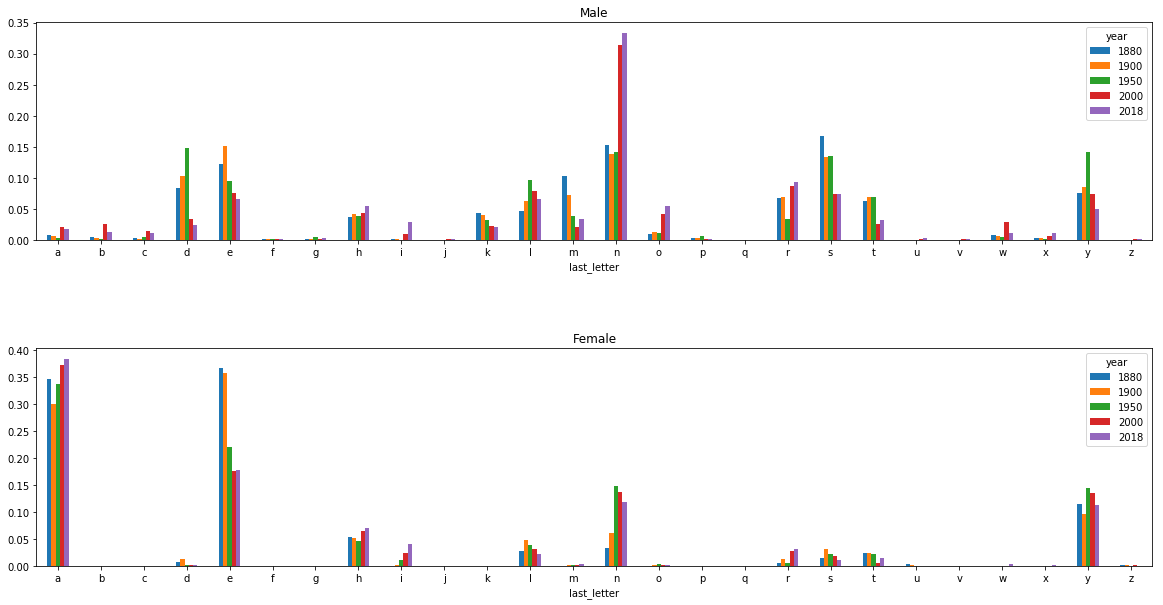

In [21]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,1,figsize=(20,10))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female')


In [22]:
letter_prop = table/table.sum()
def letters_trends(letters,sex):
    '''
    @letters, an array of the letters
    @sex, 'M' or 'F'
    '''
    df = letter_prop.loc[letters,sex].T
    return df

In [23]:
M_letters = ['d','e','n','s','y']
F_letters = ['a','e','n','y']
M_trend = letters_trends(M_letters,'M')
F_trend = letters_trends(F_letters,'F')

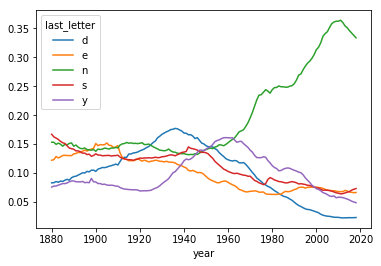

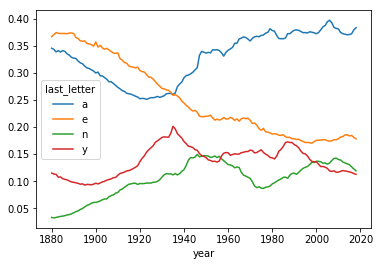

In [24]:
M_trend.plot() 
F_trend.plot() 

### Girls's names becomes boys' and vice versa
Take Lesley as an example

In [25]:
all_names = pd.Series(top1000.name.unique())
def plot_similar_names_with_sex(name):
    name_like =  all_names[all_names.str.lower().str.contains(name)]
    filtered = top1000[top1000.name.isin(name_like)]
    filtered.groupby('name').births.sum()
    table = filtered.pivot_table('births',index='year',columns='sex',aggfunc='sum')
    table = table.div(table.sum(1),axis=0)
    table.plot(style={'M':'k-','F':'k--'},color='grey')

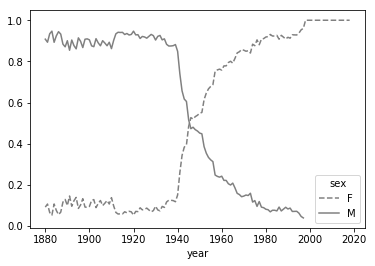

In [26]:
plot_similar_names_with_sex('lesl')

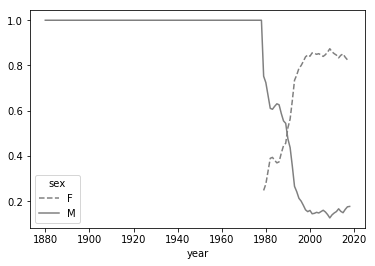

In [27]:
plot_similar_names_with_sex('taylor')

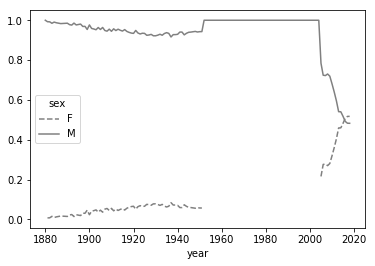

In [28]:
plot_similar_names_with_sex('charlie')

### Biblical Names

In [29]:
'Aaron' in biblename.name.values

True

In [43]:
bib_name = [name for name in all_names  if name in biblename.name.values]
# percentage of the names chosen from bible
bib_name_percentage = len(bib_name)/all_names.count()

In [44]:
bib_name_percentage = len(bib_name)/len(names.name)
bib_name_percentage

0.00011905698690781923

In [37]:
# percentage of the biblical names of all time
bib_name_birth_count=[]
for i,row in names.iterrows():
    if row.name in biblename.name.values:
        bible_name_birth_count.append(row.births)
#bib_name_birth_count = [row.births for i,row in names.iterrows() if row.name in biblename.name.values]


In [38]:
bib_name_birth_count

[]

In [41]:
a = []
a.append(row.births)
a

[5]

In [ ]:
bib_name_percentage = len(bib_name_birth_count)/names.count()
bib_name_percentage

In [ ]:
len(bib_name)